# **Comparative Analysis of SVM Kernels and LSTM for Sentiment Analysis on IMDB Movies Reviews**

# **Importing Necessary Libraries**

**Importing the libraries required for data manipulation, visualization, natural language processing, and machine learning. These include tools for text preprocessing, sentiment analysis, and model evaluation.**

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup  # For removing HTML tags

# Sentiment Analysis and Feature Representation
from textblob import TextBlob  # For polarity scores
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF Representation

# Machine Learning Models and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import time
from sklearn.svm import SVC

# Miscellaneous
import re
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Loading and Exploring the IMDB Dataset**

**Here we are going to load the IMDB dataset and explore its structure. And check for missing values, review the first few rows, and analyze the class distribution of positive and negative reviews. Additionally, a bar plot is created to visualize the class distribution.**

In [2]:
# Load the dataset
file_path = '/content/IMDBwebmining.csv'
imdb_data = pd.read_csv(file_path)

In [3]:
# Dataset shape
print(f"\nDataset contains {imdb_data.shape[0]} rows and {imdb_data.shape[1]} columns.")


Dataset contains 50000 rows and 2 columns.


In [4]:
# Displaying basic information about the dataset
print("Dataset Information:")
print(imdb_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
# Displaying the first few rows of the dataset
print("\nSample Data:")
print(imdb_data.head())


Sample Data:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
# Checking for missing values
print("\nMissing Values:")
print(imdb_data.isnull().sum())


Missing Values:
review       0
sentiment    0
dtype: int64


In [7]:
# Class distribution
print("\nClass Distribution:")
print(imdb_data['sentiment'].value_counts())


Class Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


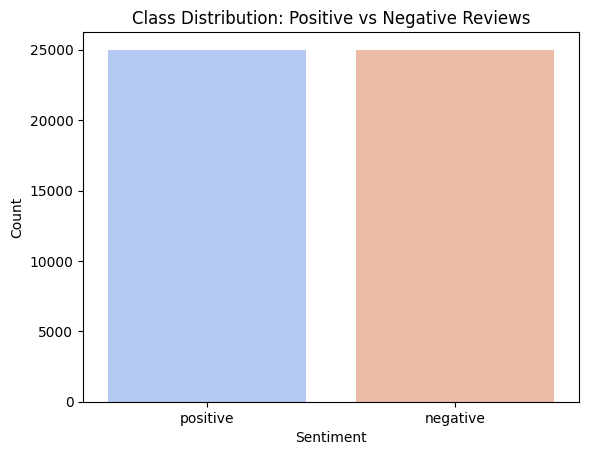

In [8]:
# Visualizing the class distribution
sns.countplot(data=imdb_data, x='sentiment', palette='coolwarm')
plt.title("Class Distribution: Positive vs Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# **Preprocessing the Data**

**Here we are going to preprocess the dataset to clean and standardize the reviews. The preprocessing includes removing HTML tags, converting text to lowercase, removing stopwords and special characters, and tokenizing the text. Additionally, we calculate polarity scores for each review to quantify sentiment strength.**

In [9]:
# Define a function for text cleaning and preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 1]

    # Join words back into a single string
    return ' '.join(words)

In [10]:
# Download necessary NLTK resources
import nltk
nltk.download('punkt')  # Punkt tokenizer
nltk.download('stopwords')  # Stopwords
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
# Applying preprocessing to the reviews
print("Preprocessing reviews...")
imdb_data['cleaned_review'] = imdb_data['review'].apply(preprocess_text)

Preprocessing reviews...


In [12]:
# Calculating the polarity scores
print("Calculating polarity scores...")
imdb_data['polarity'] = imdb_data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

Calculating polarity scores...


In [13]:
# Displaying the first few rows of the preprocessed dataset
print("\nSample Preprocessed Data:")
print(imdb_data[['review', 'cleaned_review', 'polarity']].head())


Sample Preprocessed Data:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  polarity  
0  one reviewers mentioned watching oz episode yo...  0.023433  
1  wonderful little production filming technique ...  0.109722  
2  thought wonderful way spend time hot summer we...  0.354008  
3  basically theres family little boy jake thinks... -0.057813  
4  petter matteis love time money visually stunni...  0.217952  


# **Visualizing the Preprocessed Data**

**Here we are going to visualize the impact of preprocessing by comparing the original and cleaned reviews. Additionally, we analyze the distribution of polarity scores to observe how sentiment polarity is distributed across reviews.**

In [14]:
# Comparing the original and cleaned reviews
sample_index = 0  # Change this index to view different samples
print("Original Review:")
print(imdb_data['review'][sample_index])
print("\nCleaned Review:")
print(imdb_data['cleaned_review'][sample_index])

Original Review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show 

In [15]:
# Word frequency
all_words = ' '.join(imdb_data['cleaned_review'])
word_freq = Counter(all_words.split())

In [16]:
# Most common words
print("\nMost Common Words:")
print(word_freq.most_common(10))


Most Common Words:
[('movie', 83579), ('film', 74514), ('one', 50392), ('like', 38834), ('good', 28502), ('even', 24285), ('would', 24001), ('time', 23300), ('really', 22900), ('see', 22437)]


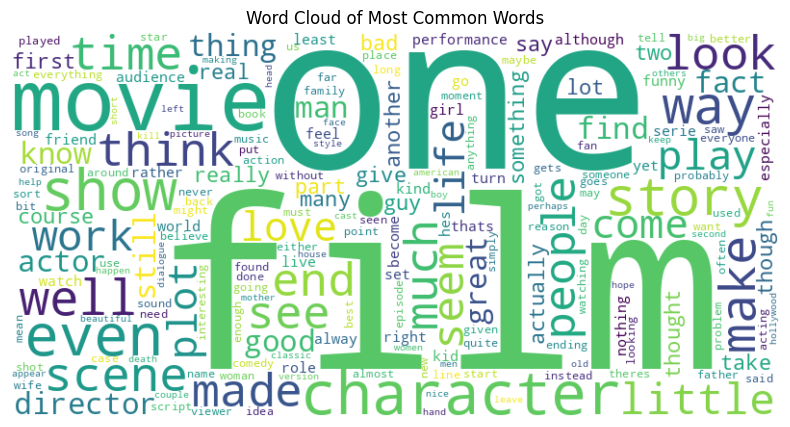

In [17]:
# Visualizing a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Common Words")
plt.show()

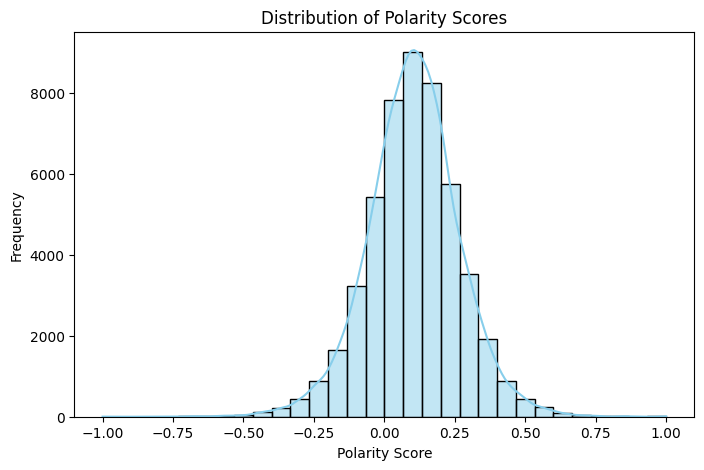

In [18]:
# Visualizing the Polarity Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(imdb_data['polarity'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()

# **Feature Engineering**

**Here we are using pre-trained GloVe embeddings to create dense vector representations of words in the reviews. These embeddings are averaged to generate document-level embeddings. Additionally, polarity scores are incorporated as extra features. The final dataset is split into training and testing sets.**

In [19]:
import gensim.downloader as api

In [20]:
# Load pre-trained GloVe embeddings (50-dimensional)
print("Loading GloVe Embeddings...")
glove_vectors = api.load("glove-wiki-gigaword-50")

Loading GloVe Embeddings...


In [21]:
# Function to get the average GloVe embedding for a review
def get_glove_embedding(text):
    words = text.split()
    embeddings = [glove_vectors[word] for word in words if word in glove_vectors]
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average of word embeddings
    else:
        return np.zeros(50)  # Returns a zero vector if no words have embeddings

In [22]:
# Applying the embedding function to the cleaned reviews
print("Generating Embeddings...")
X_glove = np.array([get_glove_embedding(text) for text in imdb_data['cleaned_review']])

Generating Embeddings...


In [23]:
# Adding the polarity scores as an additional feature
X = np.hstack((X_glove, imdb_data['polarity'].values.reshape(-1, 1)))  # Combine embeddings with polarity
y = imdb_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values  # Encode sentiment as 0/1

In [24]:
# Spliting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print("Feature Engineering Complete!")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Feature Engineering Complete!
Training set shape: (40000, 51)
Testing set shape: (10000, 51)


# **Model Implementation and Evaluation**

**Here we are going to implement and evaluate Support Vector Machines (SVM) using four different kernels: linear, polynomial, RBF, and sigmoid. For each kernel, we calculate evaluation metrics, display the classification report, and visualize the confusion matrix.**

**1. Linear Kernel:**

In [26]:
print("\nTraining SVM with Linear Kernel...")
model_linear = SVC(kernel='linear', C=1, probability=True, random_state=42)
model_linear.fit(X_train, y_train)


Training SVM with Linear Kernel...


SVC(C=1, kernel='linear', probability=True, random_state=42)

In [27]:
# Predictions
y_pred_linear = model_linear.predict(X_test)

In [28]:
# Evaluation Metrics
print("\nPerformance Metrics for Linear Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear, target_names=['negative', 'positive']))


Performance Metrics for Linear Kernel:
Accuracy: 0.8062

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.81      0.80      4961
    positive       0.81      0.81      0.81      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [29]:
# Distribution of Positive and Negative Predictions
positive_count = (y_pred_linear == 1).sum()
negative_count = (y_pred_linear == 0).sum()

In [30]:
# Create a DataFrame for visualization
distribution_df = pd.DataFrame({
    "Sentiment": ["Positive", "Negative"],
    "Count": [positive_count, negative_count],
})

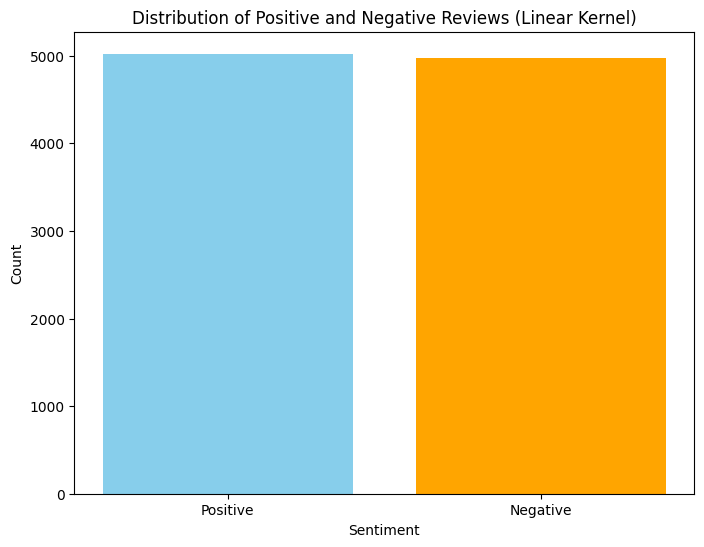

In [31]:
# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(distribution_df["Sentiment"], distribution_df["Count"], color=["skyblue", "orange"])
plt.title("Distribution of Positive and Negative Reviews (Linear Kernel)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

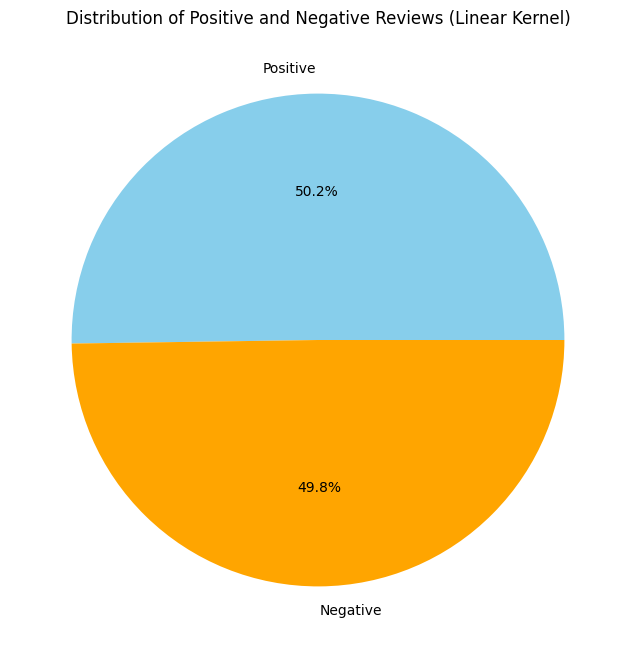

In [32]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(distribution_df["Count"], labels=distribution_df["Sentiment"], autopct='%1.1f%%', colors=["skyblue", "orange"])
plt.title("Distribution of Positive and Negative Reviews (Linear Kernel)")
plt.show()

**2. Polynomial Kernel**

In [93]:
print("\nTraining SVM with Polynomial Kernel...")
model_poly = SVC(kernel='poly', C=1, degree=3, gamma='scale', probability=True, random_state=42)
model_poly.fit(X_train, y_train)


Training SVM with Polynomial Kernel...


SVC(C=1, kernel='poly', probability=True, random_state=42)

In [94]:
# Predictions
y_pred_poly = model_poly.predict(X_test)

In [95]:
# Evaluation Metrics
print("\nPerformance Metrics for Polynomial Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly, target_names=['negative', 'positive']))


Performance Metrics for Polynomial Kernel:
Accuracy: 0.8107

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.81      0.81      4961
    positive       0.81      0.81      0.81      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [96]:
# Distribution of Positive and Negative Predictions
positive_count = (y_pred_poly == 1).sum()
negative_count = (y_pred_poly == 0).sum()

In [97]:
# Create a DataFrame for visualization
distribution_df = pd.DataFrame({
    "Sentiment": ["Positive", "Negative"],
    "Count": [positive_count, negative_count],
})

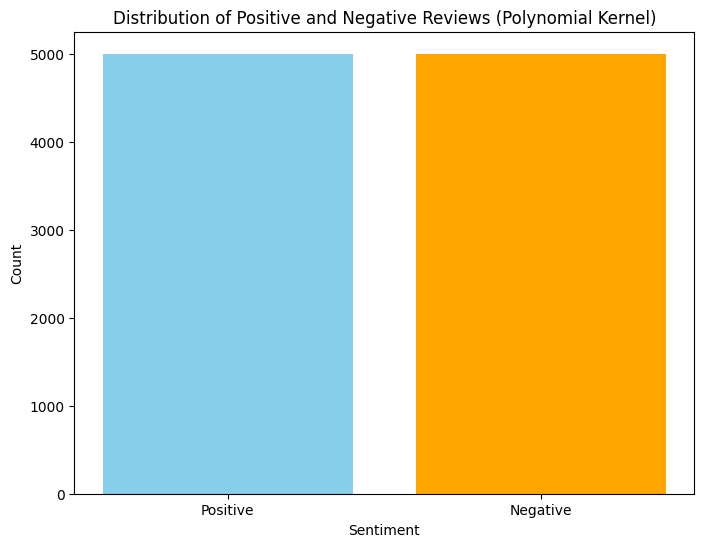

In [98]:
# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(distribution_df["Sentiment"], distribution_df["Count"], color=["skyblue", "orange"])
plt.title("Distribution of Positive and Negative Reviews (Polynomial Kernel)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

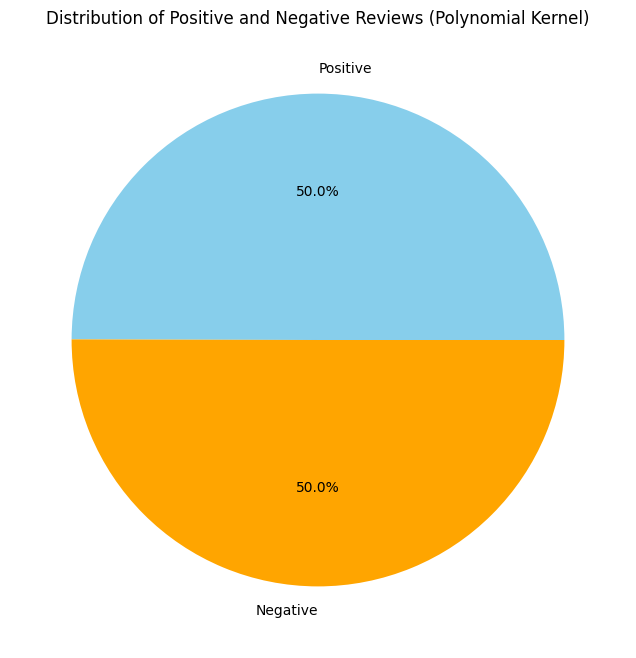

In [99]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(distribution_df["Count"], labels=distribution_df["Sentiment"], autopct='%1.1f%%', colors=["skyblue", "orange"])
plt.title("Distribution of Positive and Negative Reviews (Polynomial Kernel)")
plt.show()

**3. RBF Kernel**

In [100]:
print("\nTraining SVM with RBF Kernel...")
model_rbf = SVC(kernel='rbf', C=10, gamma=0.01, probability=True, random_state=42)
model_rbf.fit(X_train, y_train)


Training SVM with RBF Kernel...


SVC(C=10, gamma=0.01, probability=True, random_state=42)

In [101]:
# Predictions
y_pred_rbf = model_rbf.predict(X_test)

In [102]:
# Evaluation Metrics
print("\nPerformance Metrics for RBF Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=['negative', 'positive']))


Performance Metrics for RBF Kernel:
Accuracy: 0.8069

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.81      0.81      4961
    positive       0.81      0.81      0.81      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [103]:
# Distribution of Positive and Negative Predictions
positive_count = (y_pred_rbf == 1).sum()
negative_count = (y_pred_rbf == 0).sum()

In [104]:
# Create a DataFrame for visualization
distribution_df = pd.DataFrame({
    "Sentiment": ["Positive", "Negative"],
    "Count": [positive_count, negative_count],
})

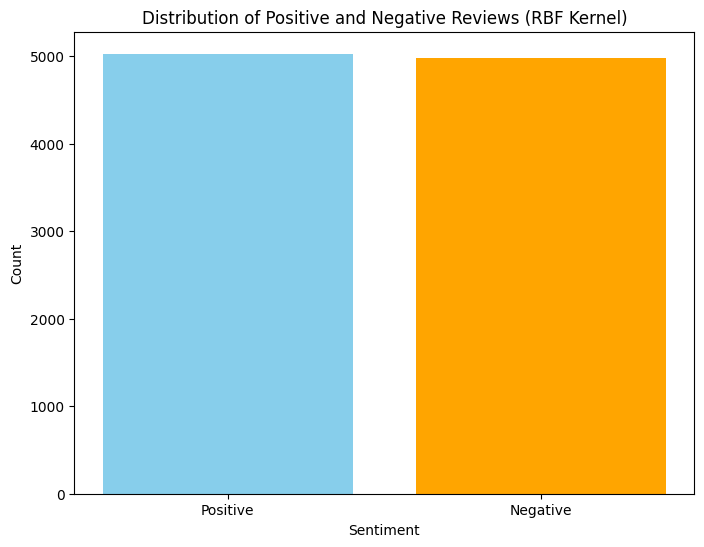

In [105]:
# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(distribution_df["Sentiment"], distribution_df["Count"], color=["skyblue", "orange"])
plt.title("Distribution of Positive and Negative Reviews (RBF Kernel)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

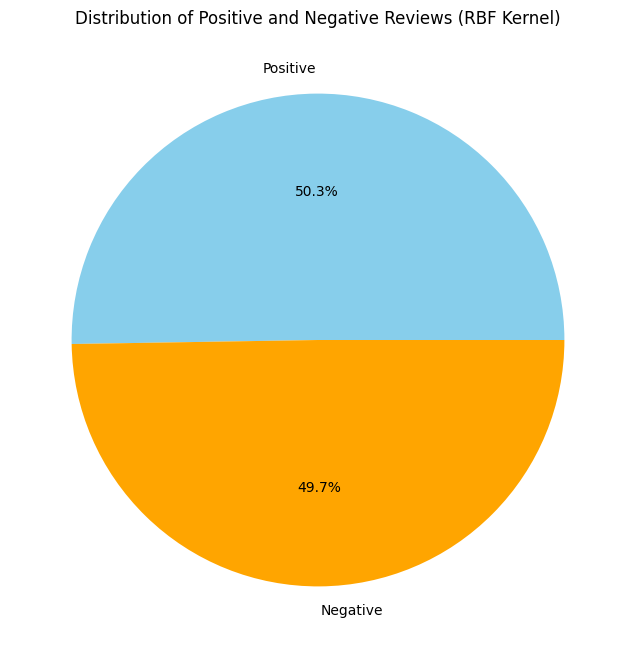

In [106]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(distribution_df["Count"], labels=distribution_df["Sentiment"], autopct='%1.1f%%', colors=["skyblue", "orange"])
plt.title("Distribution of Positive and Negative Reviews (RBF Kernel)")
plt.show()

**4. Sigmoid Kernel**

In [107]:
print("\nTraining SVM with Sigmoid Kernel...")
model_sigmoid = SVC(kernel='sigmoid', C=5, gamma='scale', probability=True, random_state=42)
model_sigmoid.fit(X_train, y_train)


Training SVM with Sigmoid Kernel...


SVC(C=5, kernel='sigmoid', probability=True, random_state=42)

In [108]:
# Predictions
y_pred_sigmoid = model_sigmoid.predict(X_test)

In [109]:
# Evaluation Metrics
print("\nPerformance Metrics for Sigmoid Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sigmoid):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid, target_names=['negative', 'positive']))


Performance Metrics for Sigmoid Kernel:
Accuracy: 0.6091

Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.60      0.60      4961
    positive       0.61      0.62      0.62      5039

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



In [110]:
# Distribution of Positive and Negative Predictions
positive_count = (y_pred_sigmoid == 1).sum()
negative_count = (y_pred_sigmoid == 0).sum()

In [111]:
# Create a DataFrame for visualization
distribution_df = pd.DataFrame({
    "Sentiment": ["Positive", "Negative"],
    "Count": [positive_count, negative_count],
})

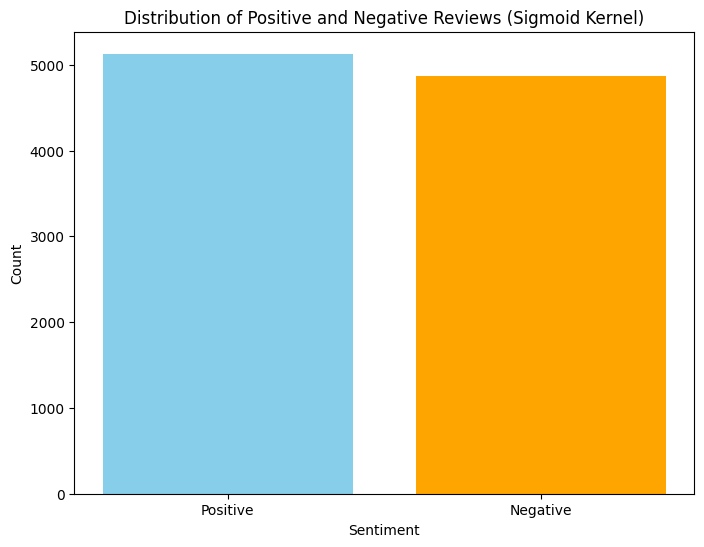

In [112]:
# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(distribution_df["Sentiment"], distribution_df["Count"], color=["skyblue", "orange"])
plt.title("Distribution of Positive and Negative Reviews (Sigmoid Kernel)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

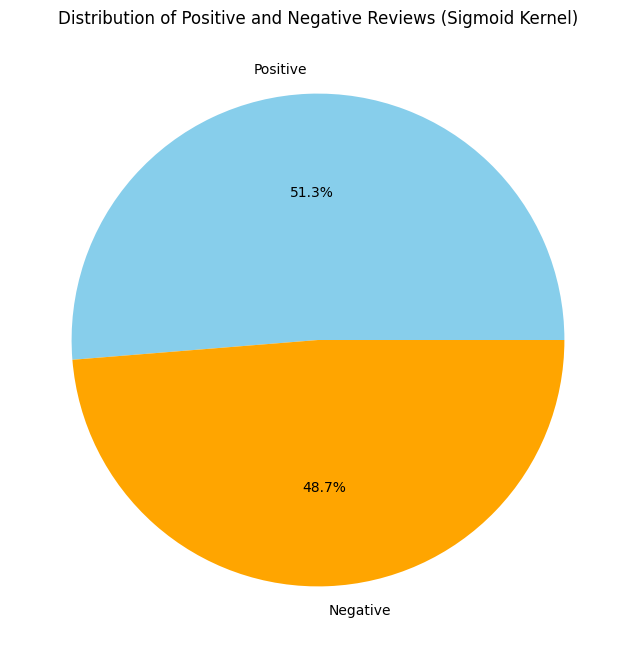

In [113]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(distribution_df["Count"], labels=distribution_df["Sentiment"], autopct='%1.1f%%', colors=["skyblue", "orange"])
plt.title("Distribution of Positive and Negative Reviews (Sigmoid Kernel)")
plt.show()

**Next, we are going to implement an LSTM model with pre-trained GloVe embeddings. The LSTM captures sequential relationships in the text data, and the output layer predicts binary sentiment. We evaluate the model's performance using accuracy, classification report, and confusion matrix.**

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [55]:
# Parameters
max_words = 5000  # Vocabulary size
max_len = 100  # Maximum sequence length
embedding_dim = 50  # Embedding size

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [57]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(imdb_data['cleaned_review'])

In [58]:
# Converting text to sequences
sequences = tokenizer.texts_to_sequences(imdb_data['cleaned_review'])

In [59]:
# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [60]:
# Split data into training and testing sets
X_train_pad, X_test_pad, y_train, y_test = train_test_split(
    padded_sequences, imdb_data['sentiment'], test_size=0.2, random_state=42
)

In [61]:
# Convert sentiments to numerical values
y_train = y_train.map({'positive': 1, 'negative': 0})
y_test = y_test.map({'positive': 1, 'negative': 0})

In [62]:
# Define LSTM Model
def create_lstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_len))  # Embedding layer
    model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.3)))  # Bidirectional LSTM
    model.add(LSTM(64, dropout=0.3))  # LSTM Layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    return model

In [63]:
# Compile the Model
lstm_model = create_lstm_model(max_words)
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# Model Summary
print(lstm_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [65]:
# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [68]:
# Train the Model
history = lstm_model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 553ms/step - accuracy: 0.8323 - loss: 0.4146 - val_accuracy: 0.8435 - val_loss: 0.4578
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 126s 491ms/step - accuracy: 0.8370 - loss: 0.4264 - val_accuracy: 0.8460 - val_loss: 0.3848
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 489ms/step - accuracy: 0.8664 - loss: 0.3434 - val_accuracy: 0.8556 - val_loss: 0.3400
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 493ms/step - accuracy: 0.8905 - loss: 0.2883 - val_accuracy: 0.8620 - val_loss: 0.3428
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 490ms/step - accuracy: 0.9029 - loss: 0.2578 - val_accuracy: 0.8624 - val_loss: 0.3437


In [69]:
# Evaluate the Model
loss, accuracy = lstm_model.evaluate(X_test_pad, y_test, verbose=1)
print(f"\nLSTM Model Accuracy on Test Data: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8510 - loss: 0.3393

LSTM Model Accuracy on Test Data: 0.8532


In [70]:
# Predictions
y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step


In [71]:
# Classification Report
print("\nClassification Report for LSTM:")
print(classification_report(y_test, y_pred_lstm, target_names=['negative', 'positive']))


Classification Report for LSTM:
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      4961
    positive       0.84      0.87      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [72]:
# Distribution of Positive and Negative Predictions
positive_count = (y_pred_lstm == 1).sum()
negative_count = (y_pred_lstm == 0).sum()

In [73]:
# Create a DataFrame for visualization
distribution_df = pd.DataFrame({
    "Sentiment": ["Positive", "Negative"],
    "Count": [positive_count, negative_count],
})

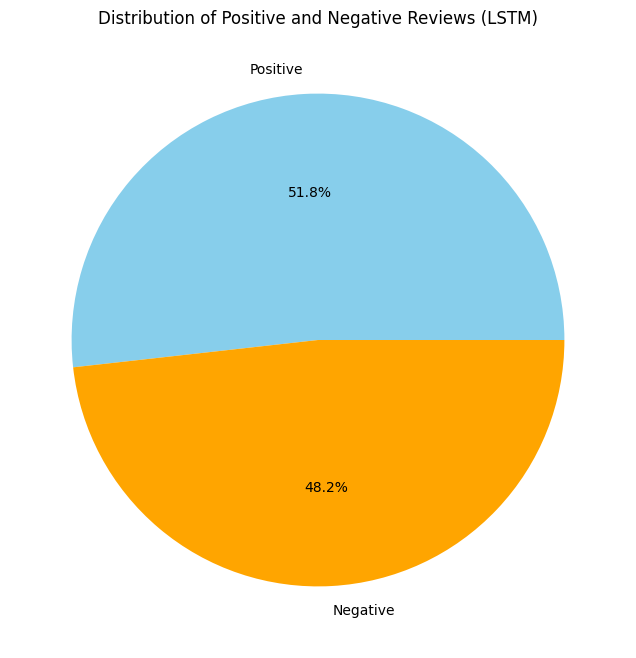

In [74]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(distribution_df["Count"], labels=distribution_df["Sentiment"], autopct='%1.1f%%', colors=["skyblue", "orange"])
plt.title("Distribution of Positive and Negative Reviews (LSTM)")
plt.show()

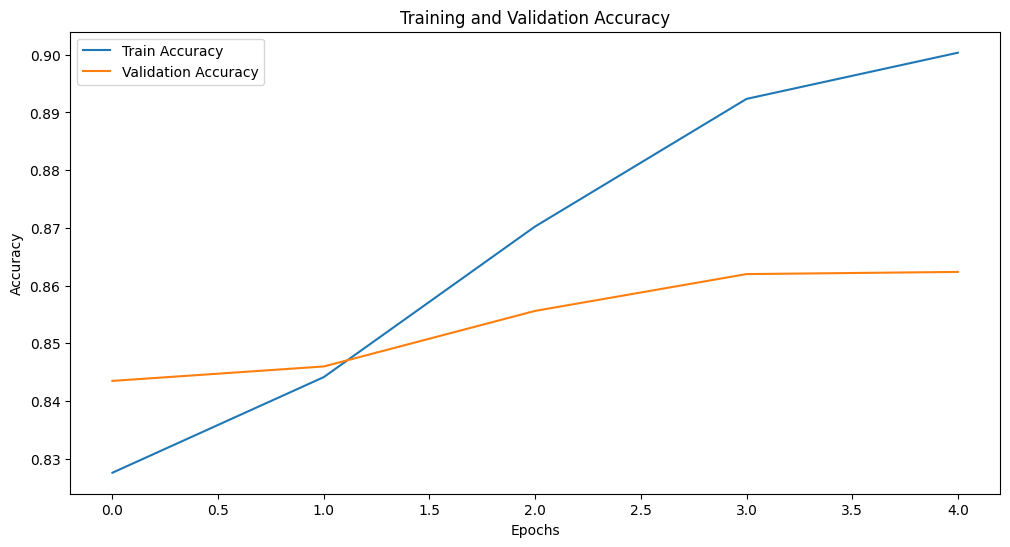

In [75]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

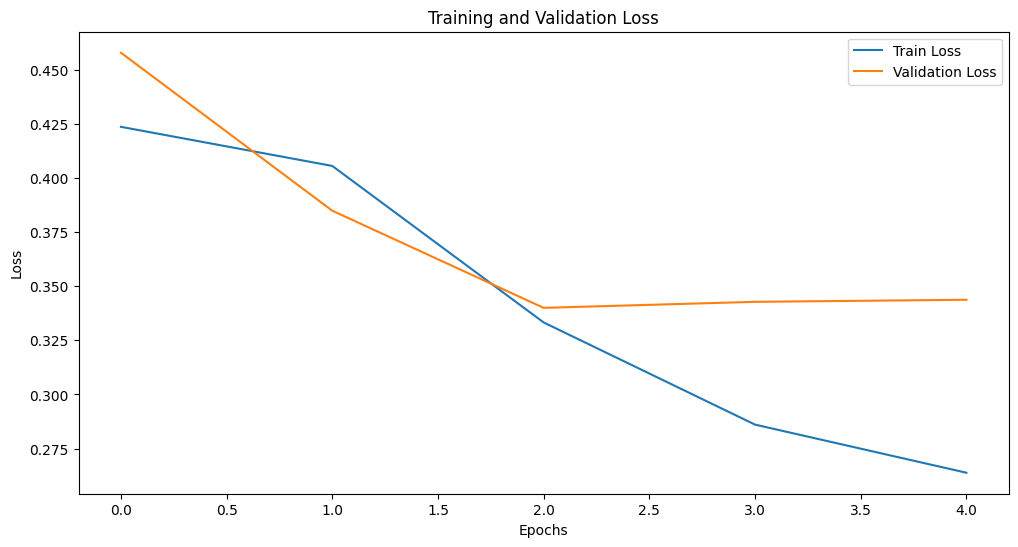

In [76]:
# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Models Comparison and Conclusion**

In [77]:
from concurrent.futures import ThreadPoolExecutor

In [114]:
# Function to calculate metrics for both positive and negative classes
def calculate_metrics(model_name, model, X_train, X_test, y_train, y_test, predict_fn):
    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train

    # Measure inference time
    start_infer = time.time()
    y_pred = predict_fn(model, X_test)
    end_infer = time.time()
    inference_time = end_infer - start_infer

    # If probabilities are available for ROC-AUC
    y_proba = predict_fn(model, X_test, proba=True) if "proba" in predict_fn.__code__.co_varnames else y_pred

    # Calculate metrics for both classes
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Positive)": precision_score(y_test, y_pred, pos_label=1),
        "Recall (Positive)": recall_score(y_test, y_pred, pos_label=1),
        "F1-Score (Positive)": f1_score(y_test, y_pred, pos_label=1),
        "Precision (Negative)": precision_score(y_test, y_pred, pos_label=0),
        "Recall (Negative)": recall_score(y_test, y_pred, pos_label=0),
        "F1-Score (Negative)": f1_score(y_test, y_pred, pos_label=0),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if "proba" in predict_fn.__code__.co_varnames else None,
        "Training Time (s)": training_time,
        "Inference Time (s)": inference_time,
    }
    return metrics

In [118]:
# SVM Models with Original Parameters
models = [
    {"name": "SVM (Linear Kernel)", "model": SVC(kernel="linear", probability=True, C=1)},
    {"name": "SVM (Polynomial Kernel)", "model": SVC(kernel="poly", probability=True, C=1, degree=3, gamma="scale")},
    {"name": "SVM (RBF Kernel)", "model": SVC(kernel="rbf", probability=True, C=10, gamma=0.01)},
    {"name": "SVM (Sigmoid Kernel)", "model": SVC(kernel="sigmoid", probability=True, C=15, gamma="scale")},
]

In [119]:
# Prediction function for sklearn models
def sklearn_predict_fn(model, X, proba=False):
    if proba:
        return model.predict_proba(X)[:, 1]  # Get probabilities for the positive class
    return model.predict(X)  # Predict labels

In [120]:
# Function to train and evaluate a single model
def train_and_evaluate(config):
    return calculate_metrics(
        model_name=config["name"],
        model=config["model"],
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        predict_fn=sklearn_predict_fn,
    )

In [121]:
# Use ThreadPoolExecutor for Parallel Execution
with ThreadPoolExecutor() as executor:
    all_results = list(executor.map(train_and_evaluate, models))

In [124]:
# Add LSTM Result
def lstm_predict_fn(model, X, proba=False):
    predictions = model.predict(X)
    return predictions if proba else (predictions > 0.5).astype("int32")

lstm_result = calculate_metrics(
    model_name="LSTM",
    model=lstm_model,
    X_train=X_train_pad,
    X_test=X_test_pad,
    y_train=y_train,
    y_test=y_test,
    predict_fn=lstm_predict_fn,
)
all_results.append(lstm_result)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 208s 167ms/step - accuracy: 0.8960 - loss: 0.2750
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


In [125]:
# Convert results to DataFrame
comparison_df = pd.DataFrame(all_results)

In [126]:
# Display the results
print("Optimized Model Comparison Results:")
print(comparison_df)

Optimized Model Comparison Results:
                     Model  Accuracy  Precision (Positive)  Recall (Positive)  \
0      SVM (Linear Kernel)    0.8062              0.808680           0.806112   
1  SVM (Polynomial Kernel)    0.8107              0.814852           0.807898   
2         SVM (RBF Kernel)    0.8069              0.809192           0.807105   
3     SVM (Sigmoid Kernel)    0.6087              0.609704           0.620957   
4                     LSTM    0.8681              0.871257           0.866243   

   F1-Score (Positive)  Precision (Negative)  Recall (Negative)  \
0             0.807394              0.803697           0.806289   
1             0.811360              0.806555           0.813546   
2             0.808147              0.804584           0.806692   
3             0.615279              0.607642           0.596251   
4             0.868743              0.864930           0.869986   

   F1-Score (Negative)   ROC-AUC  Training Time (s)  Inference Time (s)  


In [127]:
# Visualize Metrics for Both Classes
metrics_to_plot = [
    "Accuracy",
    "Precision (Positive)", "Recall (Positive)", "F1-Score (Positive)",
    "Precision (Negative)", "Recall (Negative)", "F1-Score (Negative)",
]

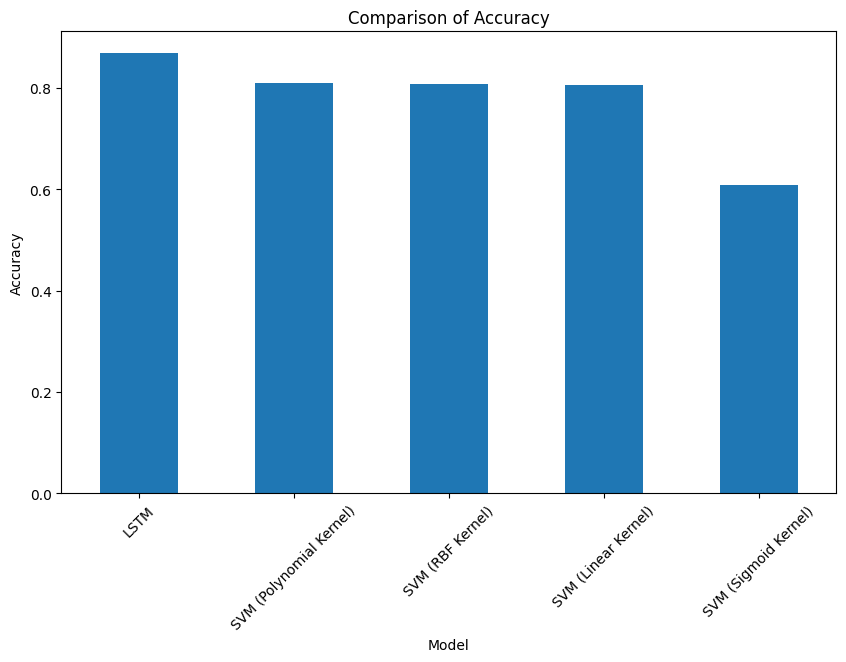

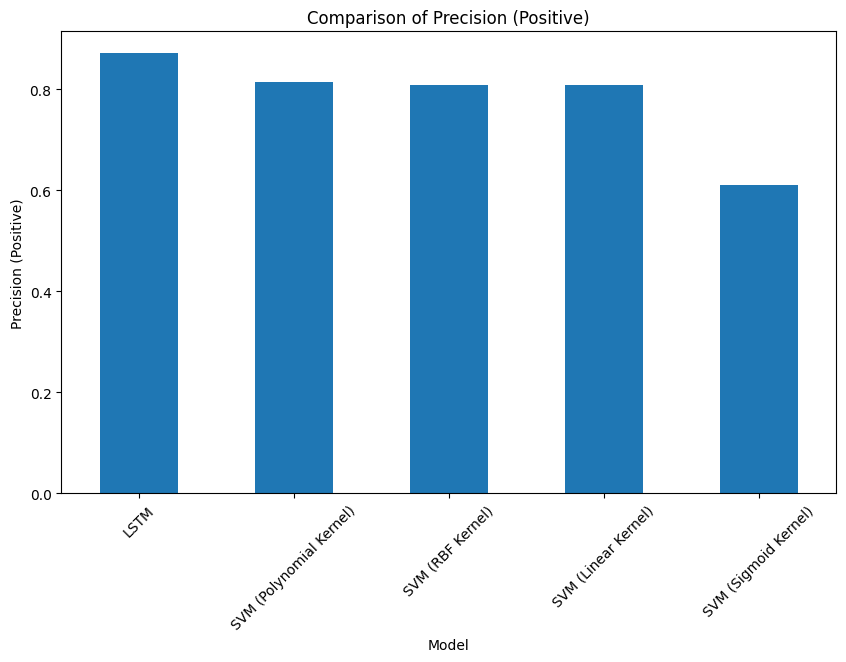

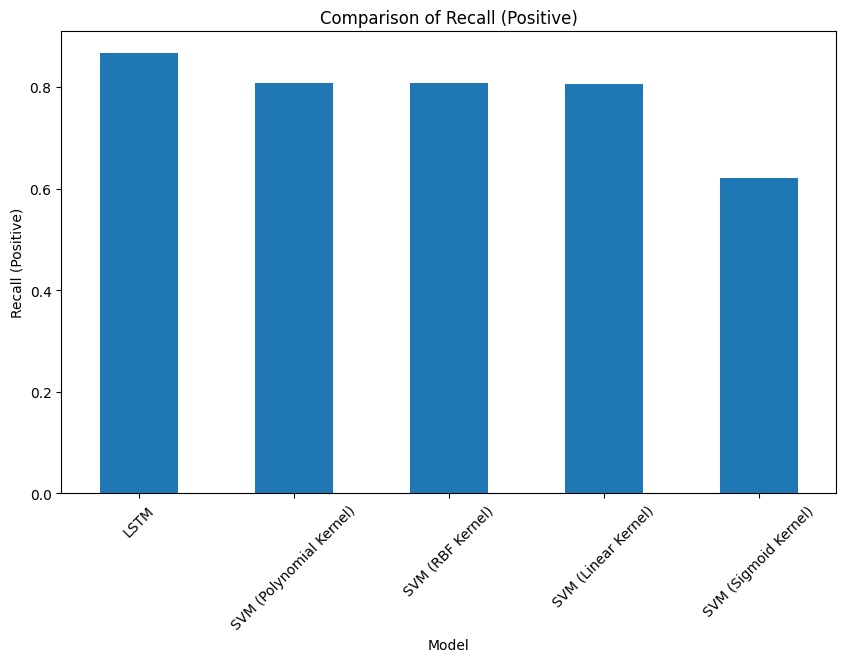

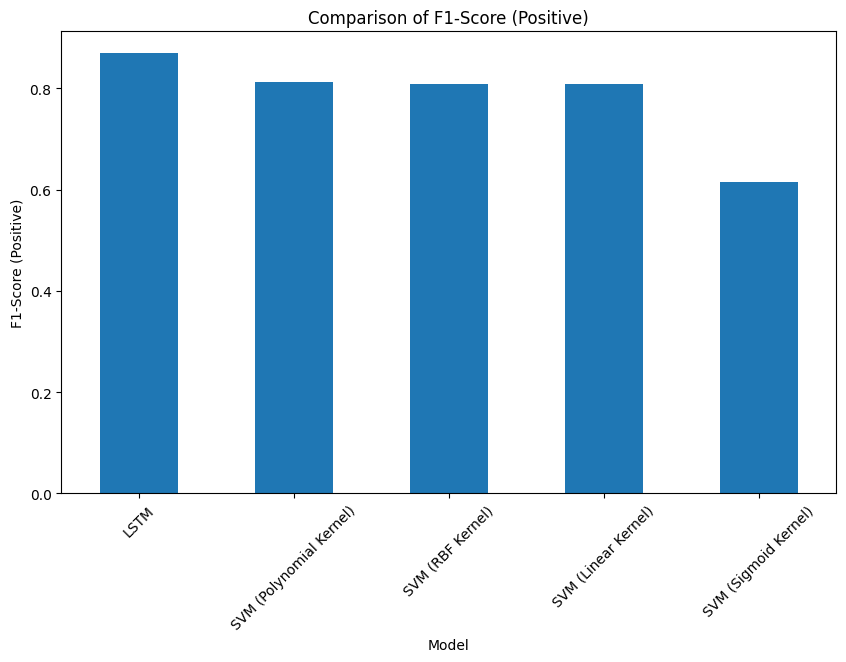

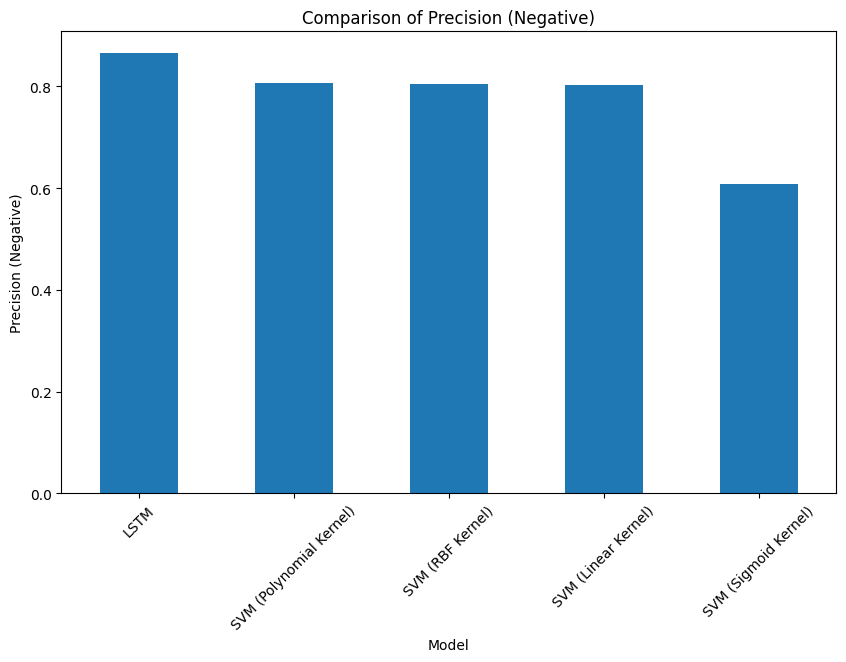

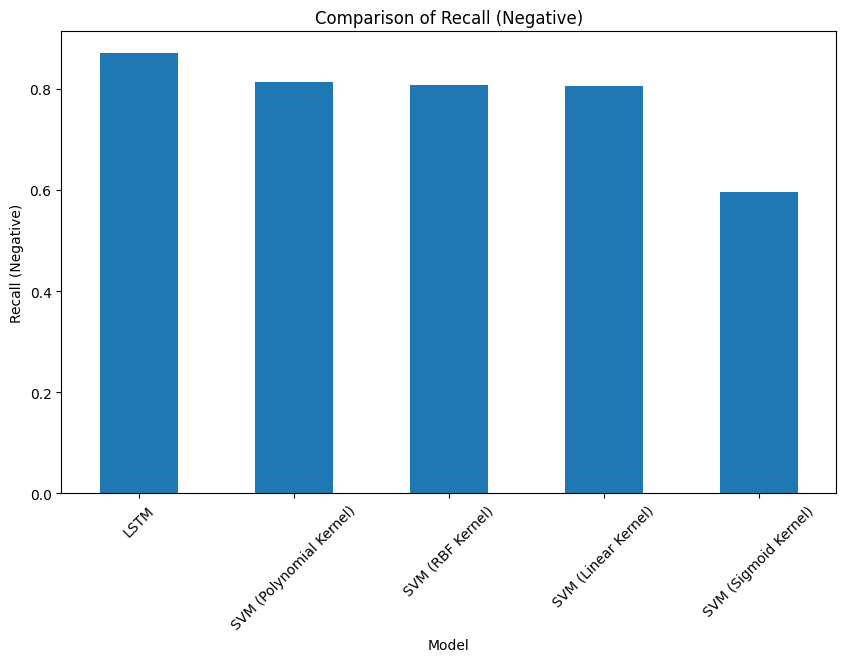

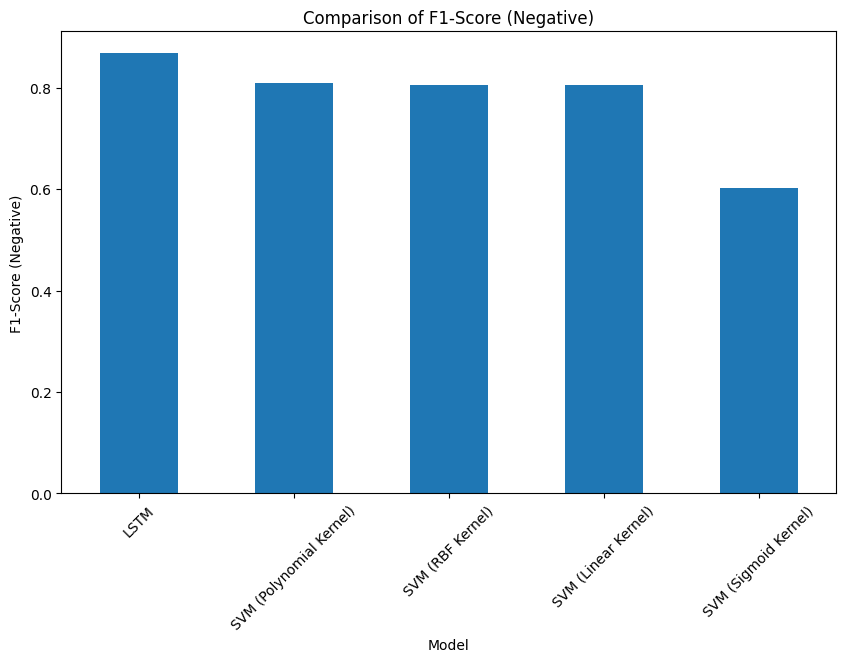

In [128]:
for metric in metrics_to_plot:
    comparison_df.sort_values(by=metric, ascending=False).plot.bar(
        x="Model", y=metric, legend=False, title=f"Comparison of {metric}", figsize=(10, 6)
    )
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()

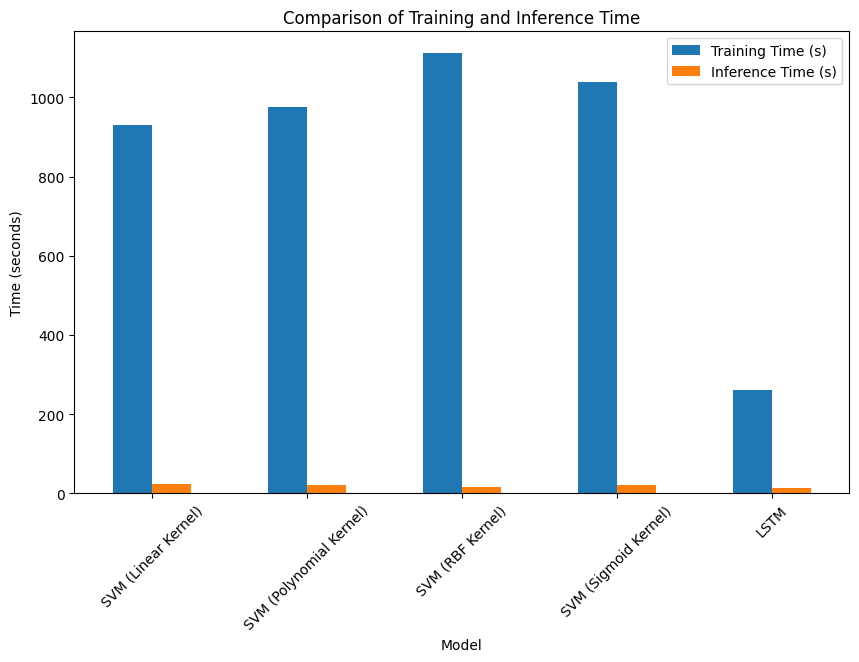

In [129]:
# Visualize Training and Inference Time
comparison_df[["Model", "Training Time (s)", "Inference Time (s)"]].set_index("Model").plot.bar(
    title="Comparison of Training and Inference Time", figsize=(10, 6)
)
plt.ylabel("Time (seconds)")
plt.xticks(rotation=45)
plt.show()